<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# убираем выводы предупреждений
import warnings
warnings.filterwarnings("ignore")


# Исследование структуры данных

1). Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [184]:
data_set = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', ';') # загружаем данные из скачанного файла

# отвечаем на вопрос в Задании 2.1
data_set_size = data_set.shape
print(f'Размерность таблицы равна {data_set_size}.')

Размерность таблицы равна (44744, 12).


2). Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [185]:
display(data_set.head(4)) # выведем первые 4 строки таблицы
display(data_set.tail(4)) # выведем последние 4 строки таблицы

# отвечаем на воппрос в Задании 2.2:
# признак 'Пол, возраст' представлен в формате <Пол , возраст , дата рождения>

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3). Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4). Обратите внимание на информацию о числе непустых значений.

In [186]:
display(data_set.info())

# отвечаем на вопрос в Задании 2.3: все столбцы имеют тип данных object

# отвечаем на вопрос в Задании 2.4
# признаки в которых есть пропуски данных: 'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5). Выведите основную статистическую информацию о столбцах.


In [187]:
display(data_set.describe())

# отвечаем на вопрос в Задании 2.5/1: в столбце «Опыт работы» содержится 44413 уникальных значений

# отвечаем на вопрос в Задании 2.5/2: самая распространённая из искомых должностей - Системный администратор

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1). Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [188]:
# создадим функцию, где аргументом будет значение признака 'Образование и ВУЗ',
# а вернется значение признака 'Образование'
def get_education(arg):
    arg = arg.lower() # уберем заглавную букву в первом слове аргумента функции
    arg_list = arg.split(' ') # создадим список куда положим отдельные слова аргумента функции
    
    if arg_list[2] == 'образование': 
        education = arg_list[0] + ' ' + arg_list[1]
    else: 
        education = arg_list[0]
    
    return education # возвращаем категорию образования 

# создадим новый признак 'Образование', воспользовавшись нашей функцией
data_set['Образование'] = data_set['Образование и ВУЗ'].apply(get_education)

# удалим признак 'Образование и ВУЗ'
data_set.drop('Образование и ВУЗ', axis=1, inplace=True)

# отвечаем на вопрос в Задании 3.1
answer = data_set['Образование'].value_counts()['среднее']
print(f'Cредний уровень образования (школьное образование) имеют {answer} соискателей.')

Cредний уровень образования (школьное образование) имеют 559 соискателей.


2). Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [189]:
# создадим функцию, где аргументом будет значение признака 'Пол, возраст',
# а вернется значение признака 'Возраст'
def get_age(arg):
    # разбиваем полученную строку на отдельные элементы, разделенные запятой, и добавляем их в список
    arg_list = arg.split(',')
    age = int(arg_list[1].split(' ')[2])
    
    return age # возвращаем возраст

# для получения признака 'Пол' используем lambda-функцию, возращая первый элемент строки из признака 'Пол, возраст'
data_set['Пол'] = data_set['Пол, возраст'].apply(lambda x: x[0])
# создадим новый признак 'Возраст', воспользовавшись функцией get_age() к признаку 'Пол, возраст'
data_set['Возраст'] = data_set['Пол, возраст'].apply(get_age)

# удалим признак 'Пол, возраст'
data_set.drop('Пол, возраст', axis=1, inplace=True)

# отвечаем на вопросы в Задании 3.2

answer_32_1 = round(data_set['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)
answer_32_2 = round(data_set['Возраст'].mean(),2)

print(f'В наших данных {answer_32_1} % женских резюме.')
print(f'Cредний возраст соискателей {answer_32_2} лет.')

В наших данных 19.07 % женских резюме.
Cредний возраст соискателей 32.2 лет.


3). Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [190]:
# модифицируем готовую функцию для получения опыта работы в месяцах  
# из PYTHON-11. Базовые приёмы работы с данными в Pandas 2. Базовые операции со столбцами DataFrame
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return np.nan # если значение признака отсутствует
   
    arg_splited = arg.split(' ')[:7]
        
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    month = 0
    year = 0
    for i, item in enumerate(arg_splited):
        if item in month_key_words: # если нашли 'месяц', то значение перед ним - число месяцев
            month = arg_splited[i-1]
        if item in year_key_words: # если нашли 'год', то значение перед ним - число лет
            year = arg_splited[i-1]
    
    
    return int(year)*12 + int(month) # возвращаем количество месяцев

# применяем функцию get_experience() к признаку 'Опыт работы', получая новый признак 'Опыт работы (месяц)'
data_set['Опыт работы (месяц)'] = data_set['Опыт работы'].apply(get_experience)

# удалим признак 'Опыт работы'
data_set.drop('Опыт работы', axis=1, inplace=True)

# отвечаем на вопрос в Задании 3.3

answer = data_set['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы (в месяцах) в нашей таблице равен {answer} месяцев.')

Медианный опыт работы (в месяцах) в нашей таблице равен 100.0 месяцев.


4). Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [191]:
# создадим функцию, где аргументом будет значение признака 'Город, переезд, командировки',
# а вернется значение признака 'Город'
def get_city(arg):
    # разбиваем полученную строку на отдельные элементы, разделенные 'пробелом-запятой-пробелом', и добавляем их в список
    arg_list = arg.split(' , ') 
    # зададим список городов-миллионников
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    # в зависимости от значения первого элемента списка возвращаем нужное значение признака 'Город'
    if arg_list[0] == 'Москва': 
        return 'Москва'
    elif arg_list[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif arg_list[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# создадим функцию, где аргументом будет значение признака 'Город, переезд, командировки',
# а вернется значение признака 'Готовность к переезду'
def get_ready_to_move(arg):
    # проверяем на наличие необходимых словосочетаний в аргументе функции
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# создадим функцию, где аргументом будет значение признака 'Город, переезд, командировки',
# а вернется значение признака 'Готовность к командировкам'
def get_ready_to_travel(arg):
    # проверяем на наличие необходимых словосочетаний в аргументе функции
    if ('командировк' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else: 
            return True
        
    else:
        return False # возвращаем False при наличии потерянных данных в аргументе
    

# последовательно применим наши 3 функции к признаку 'Город, переезд, командировки', получив новые признаки согласно условиям задачи 
data_set['Город'] = data_set['Город, переезд, командировки'].apply(get_city)
data_set['Готовность к переезду'] = data_set['Город, переезд, командировки'].apply(get_ready_to_move)
data_set['Готовность к командировкам'] = data_set['Город, переезд, командировки'].apply(get_ready_to_travel)

# удалим признак 'Город, переезд, командировки'
data_set.drop('Город, переезд, командировки', axis=1, inplace=True)

# отвечаем на вопросы в Задании 3.4

answer_34_1 = round(data_set['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)
answer_34_2 = round(data_set[data_set['Готовность к переезду'] & data_set['Готовность к командировкам']].shape[0] / data_set.shape[0] *100)

print(f'В Санкт-Петербурге проживают {answer_34_1} % соискателей.')
print(f'Готовы одновременно и к переездам и к командировкам {answer_34_2} % соискателей.')

В Санкт-Петербурге проживают 11 % соискателей.
Готовы одновременно и к переездам и к командировкам 32 % соискателей.


5). Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [192]:
# создадим список с набором категорий желаемой занятости
list_of_employments = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

# создадим список с набором категорий желаемого графика работы
list_of_schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Алгоритм решения: 
# - последовательно прогоняем переменную sign через нужный список
# - создаем признак [sign] и проверяем входит ли sign в значение признаков 'Занятость' и 'График'
# - в зависимости от этого возвращаем в признак [sign] True или False

for sign in list_of_employments:
    data_set[sign] = data_set['Занятость'].apply(lambda x: sign in x)
    
for sign in list_of_schedule:
    data_set[sign] = data_set['График'].apply(lambda x: sign in x)      
    
# удалим признаки 'Занятость' и 'График'
data_set.drop(['Занятость', 'График'], axis=1, inplace=True)

# отвечаем на вопросы в Задании 3.5

answer_35_1 = data_set[data_set['проектная работа'] & data_set['волонтерство']].shape[0]
answer_35_2 = data_set[data_set['гибкий график'] & data_set['вахтовый метод']].shape[0]

print(f'Ищут проектную работу и волонтёрство (в обоих столбцах стоит True) {answer_35_1} человек.')
print(f'Хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True) {answer_35_2} человек.')

Ищут проектную работу и волонтёрство (в обоих столбцах стоит True) 436 человек.
Хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True) 2311 человек.


6). (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [193]:
# загрузим данные с курсами валют
currency_er = pd.read_csv('data/ExchangeRates.csv', ',')

# преобразуем признак 'date' в загруженных данных в формат datetime
currency_er['date'] = pd.to_datetime(currency_er['date'], dayfirst=True)
# преобразуем признак 'Обновление резюме' в нашей таблице в формат datetime
data_set['Обновление резюме'] = pd.to_datetime(data_set['Обновление резюме'], dayfirst=True)

# вытащим из признака 'Обновление резюме' дату 
data_set['Обновление резюме'] = data_set['Обновление резюме'].dt.date
# снова преобразуем признак 'Обновление резюме' в формат datetime
data_set['Обновление резюме'] = pd.to_datetime(data_set['Обновление резюме'])

# получим из признака 'ЗП' значения для новых признаков 'Сумма' и 'Валюта'
data_set['Сумма'] = data_set['ЗП'].apply(lambda x: int(x.split(' ')[0]))
data_set['Валюта'] = data_set['ЗП'].apply(lambda x: x.split(' ')[1])

# напишем функцию, которая преобразует данные признака 'Валюта' в формат ISO
def get_currency_iso(arg):
    
    dict_currency = {'руб.':'RUB', 'бел.руб.':'BYN', 'грн.':'UAH', 'сум':'UZS'}
    
    if arg in dict_currency:
        return dict_currency[arg]
    else: 
        return arg # остальные значения уже будут в формате ISO, их просто возвращаем назад

# применяем функцию, значения признака 'Валюта' будут преобразованы в ISO    
data_set['Валюта'] = data_set['Валюта'].apply(get_currency_iso)

# объединяем нашу таблицу и таблицу с курсами валют по признакам даты и валюты
data_set = data_set.merge(
    currency_er,  how='left',
    left_on=['Обновление резюме','Валюта'], right_on = ['date','currency']
)

# заполняем пропуски (они соотвествуют данным в рос.рублях) в признаках, которые понадобятся для расчета ЗП в рублях
data_set['close'] = data_set['close'].fillna(1)
data_set['proportion'] = data_set['proportion'].fillna(1)

# создаем новый признак 'ЗП (руб)' и расчитываем его значения
data_set['ЗП (руб)'] = data_set['Сумма'] * data_set['close'] / data_set['proportion']

# удаляем ненужные столбцы 
data_set.drop(['ЗП', 'Сумма', 'Валюта', 'currency', 'per', 
               'date', 'time', 'close', 'vol', 'proportion'], 
              axis=1, inplace=True)

# отвечаем на вопрос в Задании 3.6
answer = round(data_set['ЗП (руб)'].median() / 1000)
print(f'Желаемая медианная заработная плата соискателей в нашей таблице (в рублях) равна {answer} тыс. рублей')

Желаемая медианная заработная плата соискателей в нашей таблице (в рублях) равна 59 тыс. рублей


# Исследование зависимостей в данных

1). Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

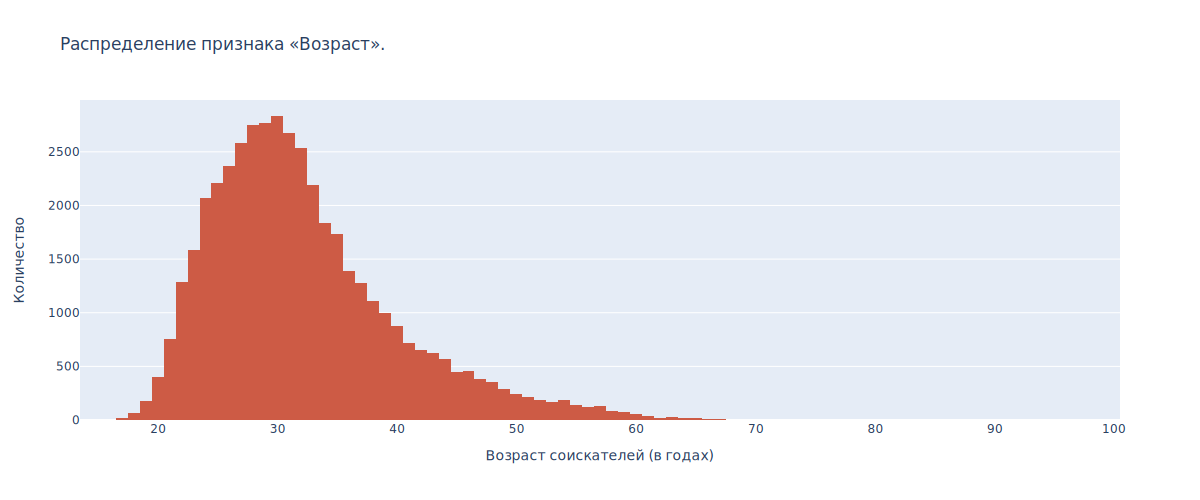

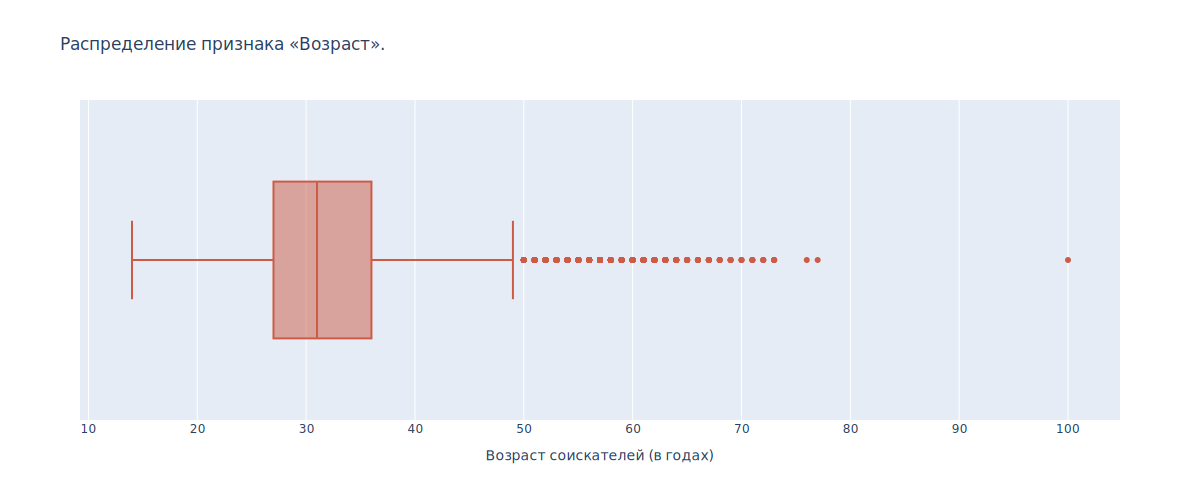

In [194]:
# построим распределение признака «Возраст»
 
# гистограмма
fig_hist = px.histogram(data_set, x='Возраст', nbins=100,
                   title='Распределение признака «Возраст».',
                   labels={'Возраст':'Возраст соискателей (в годах) '},
                   color_discrete_sequence=['#cd5b45'],
                   height=500,width=1200
                   )
fig_hist.update_yaxes(title_text='Количество')
fig_hist.show('svg')

# коробчатая диаграмма
fig_box = px.box(data_set, x='Возраст',
             title='Распределение признака «Возраст».',
             labels={'Возраст':'Возраст соискателей (в годах) '},
             color_discrete_sequence=['#cd5b45'],
             height=500,width=1200
             ) 

fig_box.show('svg')

fig_hist.write_html("plotly/1.html")
fig_box.write_html("plotly/2.html")

[ссылка на вехнюю диаграмму](plotly/1.html)  
[ссылка на нижнюю диаграмму](plotly/2.html)
### Выводы по диаграммам.
- Мода распределения равна 30 годам.   
- Предельные значения признака - 14 и 100 лет. Возраст большинства соискателей находится в интервале 25-35 лет.     
- К аномалиям я бы причислил возраст старше 73 лет.
***

2). Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

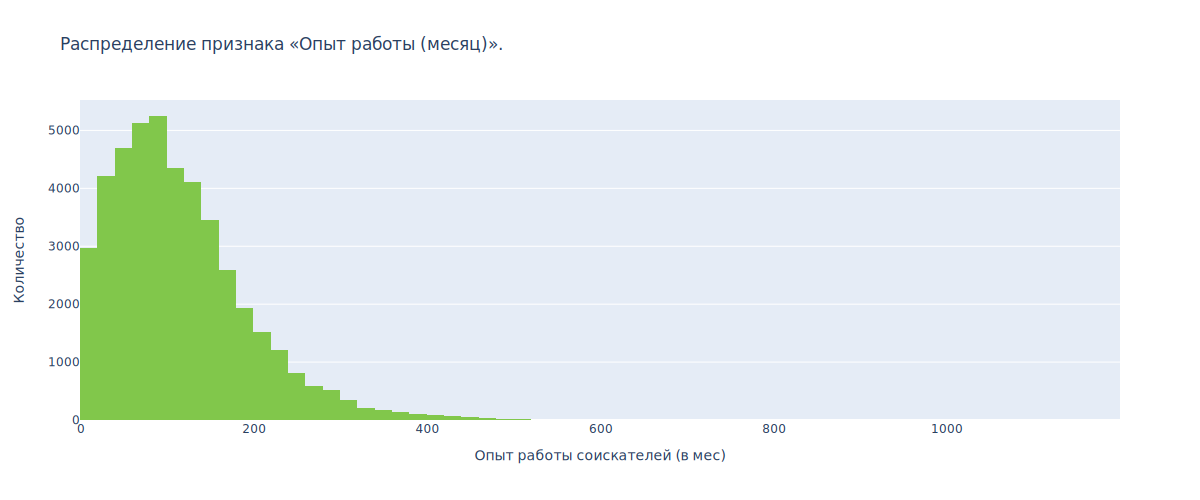

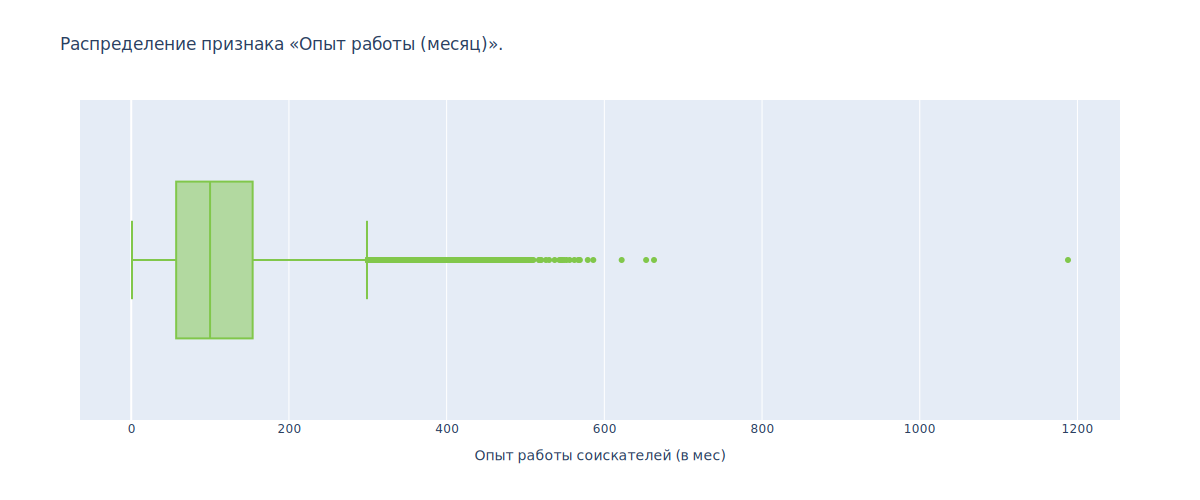

In [195]:
# построим распределение признака «Опыт работы (месяц)». 

# гистограмма
fig_hist = px.histogram(data_set, x='Опыт работы (месяц)', nbins=100,
                   title='Распределение признака «Опыт работы (месяц)».',
                   labels={'Опыт работы (месяц)':'Опыт работы соискателей (в мес) '},
                   color_discrete_sequence=['#81c74b'],
                   height=500,width=1200
                   )
fig_hist.update_yaxes(title_text='Количество')
fig_hist.show('svg')

# коробчатая диаграмма
fig_box = px.box(data_set, x='Опыт работы (месяц)',
             title='Распределение признака «Опыт работы (месяц)».',
             labels={'Опыт работы (месяц)':'Опыт работы соискателей (в мес) '},
             color_discrete_sequence=['#81c74b'],
             height=500,width=1200
             ) 

fig_box.show('svg')

fig_hist.write_html("plotly/3.html")
fig_box.write_html("plotly/4.html")

[ссылка на вехнюю диаграмму](plotly/3.html)  
[ссылка на нижнюю диаграмму](plotly/4.html)
### Выводы по диаграммам.
- Мода распределения равна 81 месяц.  
- Предельные значения признака - 0 и 1188 месяцев. Опыт работы большинства соискателей находится в интервале 20-160 месяцев.  
- К аномалиям я бы причислил опыт больше 600 месяцев.
***

3). Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


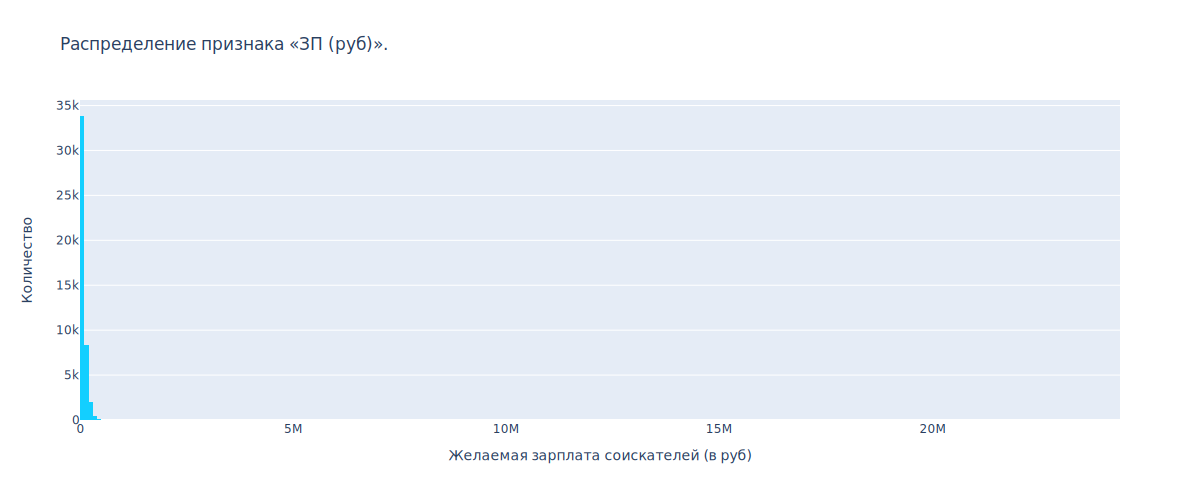

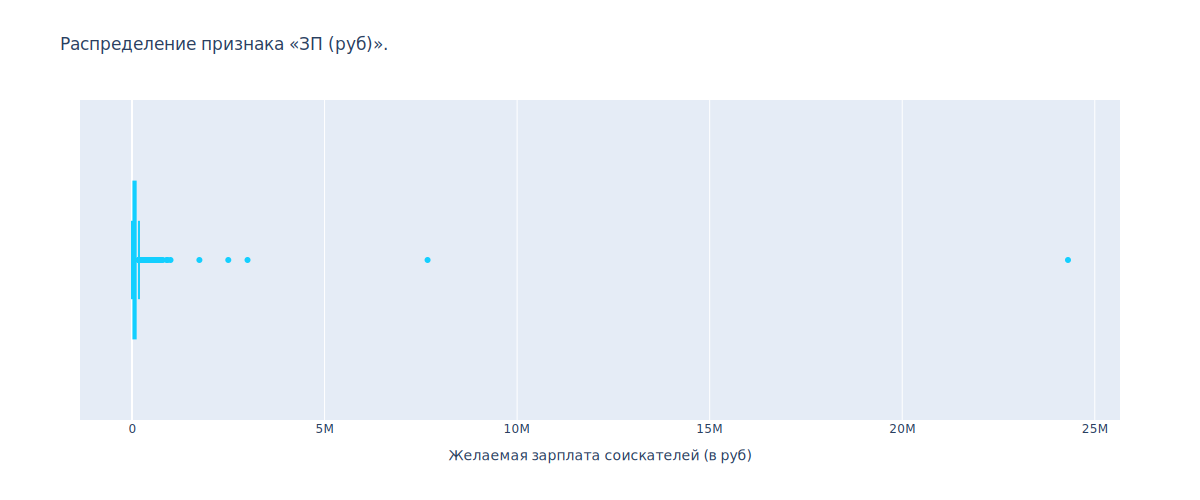

In [196]:
# построим распределение признака «ЗП (руб)».

# гистограмма
fig_hist = px.histogram(data_set, x='ЗП (руб)', nbins=300,
                   title='Распределение признака «ЗП (руб)».',
                   labels={'ЗП (руб)':'Желаемая зарплата соискателей (в руб) '},
                   color_discrete_sequence=['#13cfff'],
                   height=500,width=1200
                   )
fig_hist.update_yaxes(title_text='Количество')
fig_hist.show('svg')

# коробчатая диаграмма
fig_box = px.box(data_set, x='ЗП (руб)',
             title='Распределение признака «ЗП (руб)».',
             labels={'ЗП (руб)':'Желаемая зарплата соискателей (в руб) '},
             color_discrete_sequence=['#13cfff'],
             height=500,width=1200
             ) 

fig_box.show('svg')

fig_hist.write_html("plotly/5.html")
fig_box.write_html("plotly/6.html")

[ссылка на вехнюю диаграмму](plotly/5.html)  
[ссылка на нижнюю диаграмму](plotly/6.html)
### Выводы по диаграммам.
- именно так выглядят типичные графики распределений с выбросами в данных.
- мода распределения равна 50 000 рублей.  
- предельные значения признака - 1 и 24 304 876 рублей. Заработная плата большинства соискателей находится в интервале 35-100 тыс. рублей.  
- к аномалиям я бы причислил заработную плату ниже 10 тыс. рублей (это ниже уровня прожиточного минимума в РФ в 2018-19гг.) и выше 1 млн. рублей.
- 5 соискателей расчитывают на зарплату более 1 млн. рублей.
***

4). Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

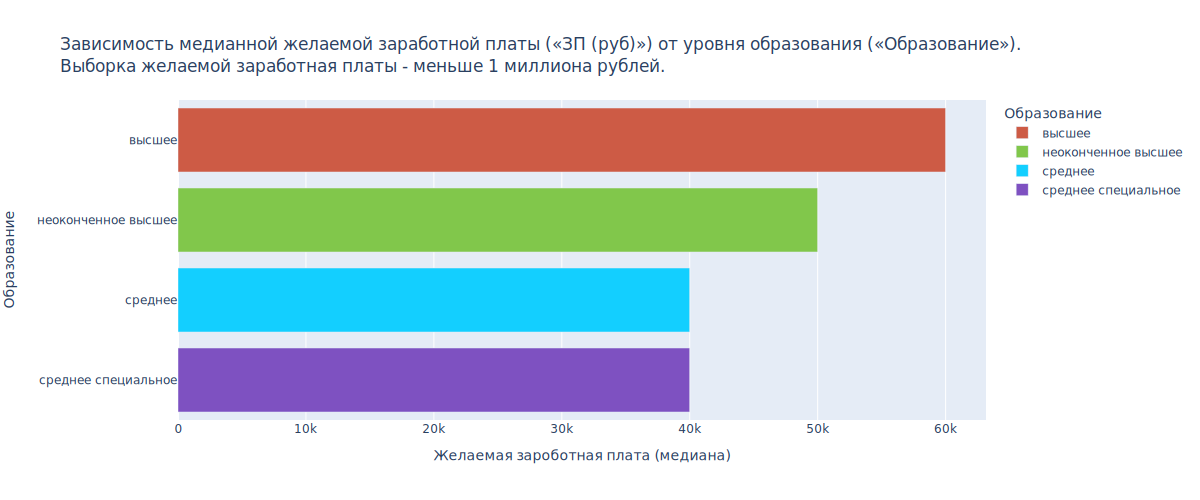

In [197]:
# построим диаграмму, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)»)
# от уровня образования («Образование»).

# отфильтруем и сгруппируем наши данные под условия задачи
mask = data_set['ЗП (руб)'] < 1000000
data_set_mask = data_set[mask].groupby(by=['Образование'], as_index=False)['ЗП (руб)'].median()

# столбчатая диаграмма
fig = px.bar(data_set_mask, x='ЗП (руб)', y='Образование', color='Образование', 
                 title='Зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»).<br>Выборка желаемой заработная платы - меньше 1 миллиона рублей.',
                 labels={'ЗП (руб)':'Желаемая зароботная плата (медиана) ', 
                         'Образование':'Образование ',
                         },
                 color_discrete_sequence=['#cd5b45', '#81c74b', '#13cfff', '#7e51c1'],
                 height=500,width=1200
                 )

fig.show('svg')

fig.write_html("plotly/7.html")

[ссылка на диаграмму](plotly/7.html) 
### Выводы по представленной диаграмме.
- Наименьший уровень желаемой заработной платы наблюдается для среднего и среднего специального образования.  
- Наибольший уровень желаемой заработной платы наблюдается для высшего образования.  
- Признак уровня образования при прогнозировании заработной платы безусловно важен.
***

5). Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

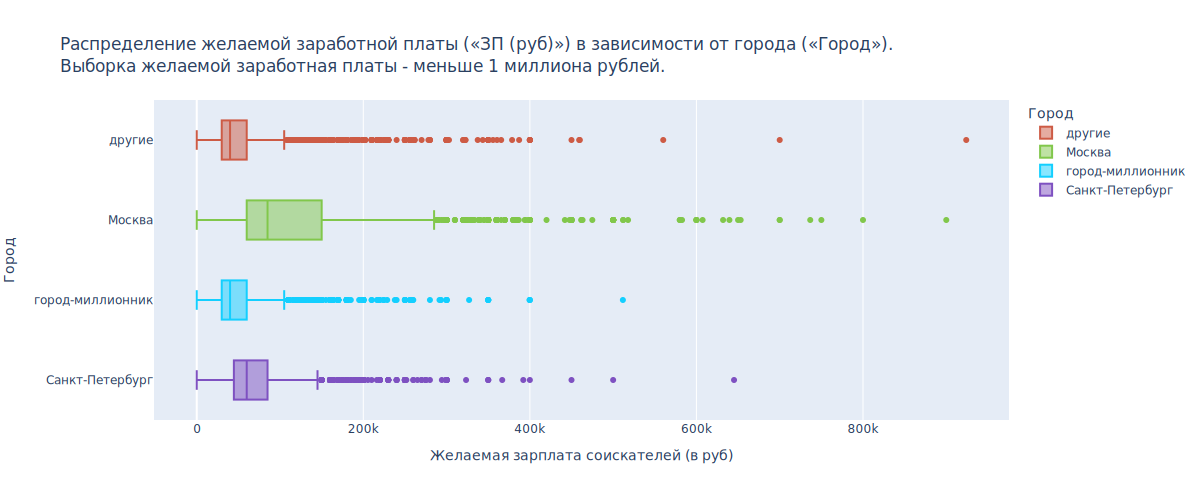

In [198]:
# построим диаграмму, которая показывает распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»).

# отфильтруем наши данные под условия задачи
mask = data_set['ЗП (руб)'] < 1000000

# коробчатая диаграмма
fig = px.box(data_set[mask], x='ЗП (руб)', y='Город', color='Город',
             title='Распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»).<br>Выборка желаемой заработная платы - меньше 1 миллиона рублей.',
             labels={'ЗП (руб)':'Желаемая зарплата соискателей (в руб) ',
                     'Город':'Город '
                     },
             color_discrete_sequence=['#cd5b45', '#81c74b', '#13cfff', '#7e51c1'],
             height=500,width=1200
             ) 

fig.show('svg')

fig.write_html("plotly/8.html")

[ссылка на диаграмму](plotly/8.html) 
### Выводы по представленной диаграмме.
- Медианные уровни желаемой заработной платы и их размах больше в Москве и Санкт-Петербурге. В Москве эти значения наибольшие.   
- Медианные уровни желаемой заработной платы и их размах в городах миллионниках и других городах одинаковы и, в то же время, меньше, чем в столицах. 
- В других городах зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей).
- Признак города при прогнозировании заработной платы безусловно важен.
***

6). Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

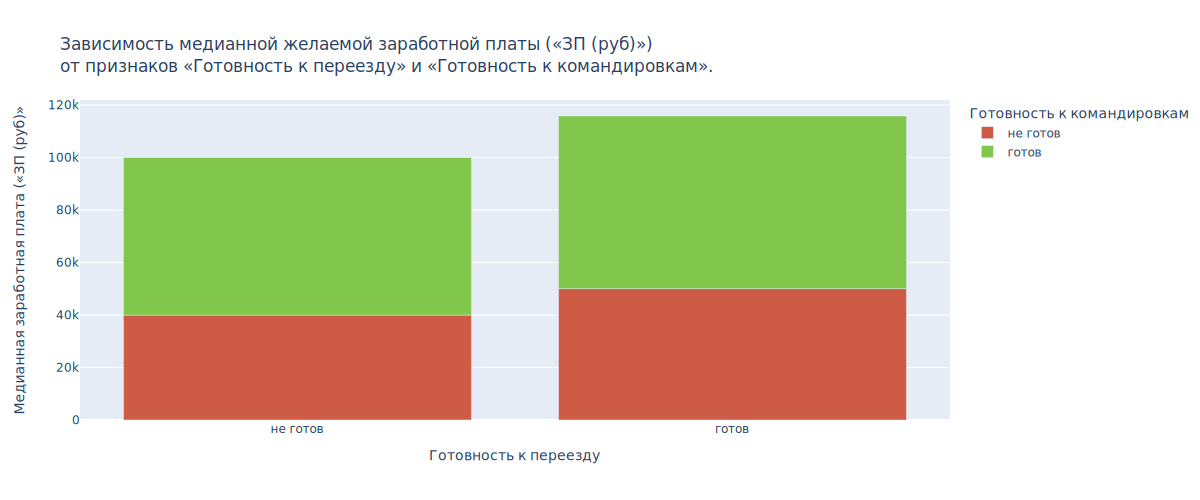

In [199]:
# Построим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы («ЗП (руб)») 
# от признаков «Готовность к переезду» и «Готовность к командировкам». 

# создадим сводную таблицу под условия задачи
data_set_pivot = data_set.pivot_table(
    values='ЗП (руб)',
    index='Готовность к переезду',
    columns='Готовность к командировкам',
    aggfunc='median', 
)
# переименуем значения True/False на готов/не готов для улучшения читаемости диаграммы
data_set_pivot = data_set_pivot.rename(columns={True: 'готов', False: 'не готов'}, 
                                       index={True: 'готов', False: 'не готов'})

# столбчатая диаграмма
fig = px.bar(data_set_pivot, 
                 title='Зависимость медианной желаемой заработной платы («ЗП (руб)»)<br>от признаков «Готовность к переезду» и «Готовность к командировкам».',
                 labels={'value':'Медианная заработная плата («ЗП (руб)» ',
                         'Готовность к переезду':'Готовность к переезду ',
                         'Готовность к командировкам': 'Готовность к командировкам '
                         },
                 color_discrete_sequence=['#cd5b45', '#81c74b', '#13cfff', '#7e51c1'],
                 height=500,width=1200
                 )


fig.show('svg')

fig.write_html("plotly/9.html")

[ссылка на диаграмму](plotly/9.html)
### Выводы по представленной диаграмме.
- Наименьшая медианная желаемая заработная плата в категории соискателей не готовых к переезду и коммандировкам (40 тыс. рублей).
- Наоборот, наибольшая медианная желаемая заработная плата в категории соискателей готовых и к переезду, и к коммандировкам (66 тыс. рублей).
- Медианная желаемая заработная плата в категории соискателей готовых к коммандировкам, но не готовых к переезду 60 тыс. рублей, что больше, чем в категории соискателей готовых к переезду, но не готовых к командировкам (50 тыс. рублей).
***

7). Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

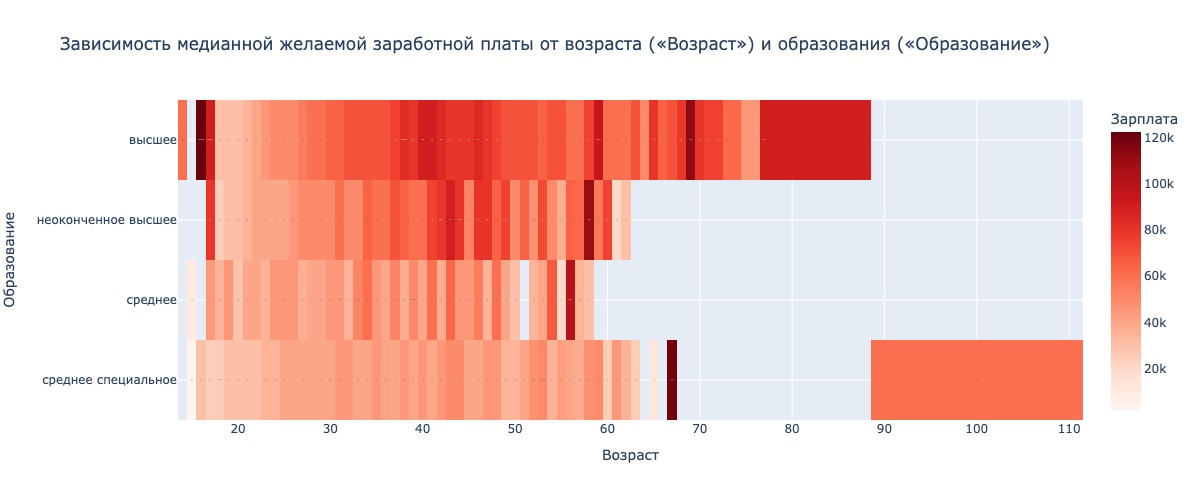

In [200]:
# Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы 
# от возраста («Возраст») и образования («Образование»).
data_set_pivot = data_set.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median', 
)
# строим тепловую карту
fig = px.imshow(data_set_pivot, text_auto=True,
                title="Зависимость медианной желаемой заработной платы от возраста («Возраст») и образования («Образование»)",
                labels=dict(color='Зарплата'),
                width=1200, 
                height=500, 
                color_continuous_scale='Reds' 
                )

fig.show('jpeg')

fig.write_html("plotly/10.html")

[ссылка на диаграмму](plotly/10.html)
### Выводы по представленной тепловой карте.
- на представленной диаграмме имеются пустые ячейки, где не указана медианная заработная плата:
    - в категории высшего образования  - возраст 15 лет, возраст более 77 лет
    - в категории неоконченного высшего образования - 14-16 лет,более 63 лет
    - в категории среднего образования - 14,16,51, более 58 лет
    - в категории среднего специального - 14,64,66 лет, более 68 лет. Исключение - 100 лет, зарплата 60 тыс. руб, что является аномалией.
- явные аномалии:
    - в категории высшего образования - ниже 21 года быть соискателем очень маловероятно (с учетом 11-летнего школьного образования + бакалавриат 4 года)
    - в категории среднего специального - 100 лет, зарплата 60 тыс. рублей
- наиболее широкий возрастной интервал имеют соискатели с высшим образованием: нет пустых значений от 21 до 77 лет. Возрастные интервалы остальных соискателей схожи - от 15-17лет, но не более 67 лет
- ожидаемая медианная зарплата выше всего в категории высшего образования и неоконченного высшего (чуть ниже), с возрастом соискателя она растет, причем в категории высшего образования наиболее явно в 2-х временных интервалах: до 41 года, 60-69 лет. В категории неоконченного высшего - интервал явного роста зарплаты до 43 лет.
- диапазон медиан зарплат внутри групп:
    - высшее образование: 30-112 тыс. рублей (не берем в расчет аномалию 16 лет - 123 тыс. рублей)
    - неоконченное высшее: 25-110 тыс. рублей
    - среднее: 10-100 тыс. рублей
    - среднее специальное: 2 - 120 тыс. рублей. Однако надо отметить, что эти значения соответствуют краям возрастного диапазона и могут быть аномалиями. Если это так, то более реальный диапазон зарплат в данном признаке находится в интервале 25-50 тыс. рублей.
***

8). Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [201]:
# построим диаграмму рассеяния, показывающую зависимость опыта работы («Опыт работы (месяц)») от возраста («Возраст»). 

# ПРИМЕЧАНИЕ: я не нашел, к сожалению, других способов добавить на график прямую, проходящую через точки (0, 0) и (100, 100),
# без импорта дополнительной библиотеки plotly.graph_objects. Без нее я могу добавить только вертикальную или горизонтальную линию.
# Учитывая это, я не стал выносить импорт данной библиотеки в 1-ю ячейку согласно PEP-8, т.к. формально я нарушаю условия задания.
import plotly.graph_objects as go


# Опыт работы переводим из месяцев в года, чтобы признаки были в едином масштабе.
data_set['Опыт работы (год)'] = data_set['Опыт работы (месяц)'] / 12

# диаграмма рассеяния
fig = px.scatter(data_set, x='Возраст', y='Опыт работы (год)', 
                 title="Зависимость опыта работы («Опыт работы (год)») от возраста («Возраст»)",
                 labels={'Опыт работы (год)':'Опыт работы (год) ',
                         'Возраст':'Возраст ',
                         },
                 color_discrete_sequence=['#7e51c1'],
                 height=500,width=1200
                 )
fig.add_traces(go.Scatter(x=[0, 100], y=[0, 100]))

#fig.show('')

fig.write_image('plotly/img11.png')
fig.write_html("plotly/11.html")

# АЛЬТЕРНАТИВНЫЙ вариант решения без импорта библиотеки и построения прямой. 
# Число точек, которые будут лежать строго ВЫШЕ построенной прямой, можно расчитать по формуле:
result = data_set['Опыт работы (год)'][data_set['Опыт работы (год)'] > data_set['Возраст']].count()
print(f'Строго выше построенной прямой будут лежать {result} точек.')

# удалим признак 'Опыт работы (год)'
data_set.drop('Опыт работы (год)', axis=1, inplace=True)

Строго выше построенной прямой будут лежать 7 точек.


![Диаграмма](plotly/img11.png "Для просмотра HTML-версии нажмите ссылку ниже")


[ссылка на диаграмму](plotly/11.html)
### Выводы по представленной диаграмме.
- на построенной прямой точек нет.
- строго ВЫШЕ прямой лежат семь точек, которые будут явными аномалиями - у данных соискателей опыт работы превышает их возраст.
- если бы, получив признак 'Опыт работы (год)', где указан опыт соискателя в годах, я бы округлил значения до целого (ведь возраст соискателей указан в целых числах), то в этом случае 2 точки оказались бы на прямой. Однако, эти 2 точки также бы являлись явными аномалиями, т.к. в них возраст соискателя равнялся бы его опыту. Другими словами, в любом случае мы получаем 7 явных аномалий.
***

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


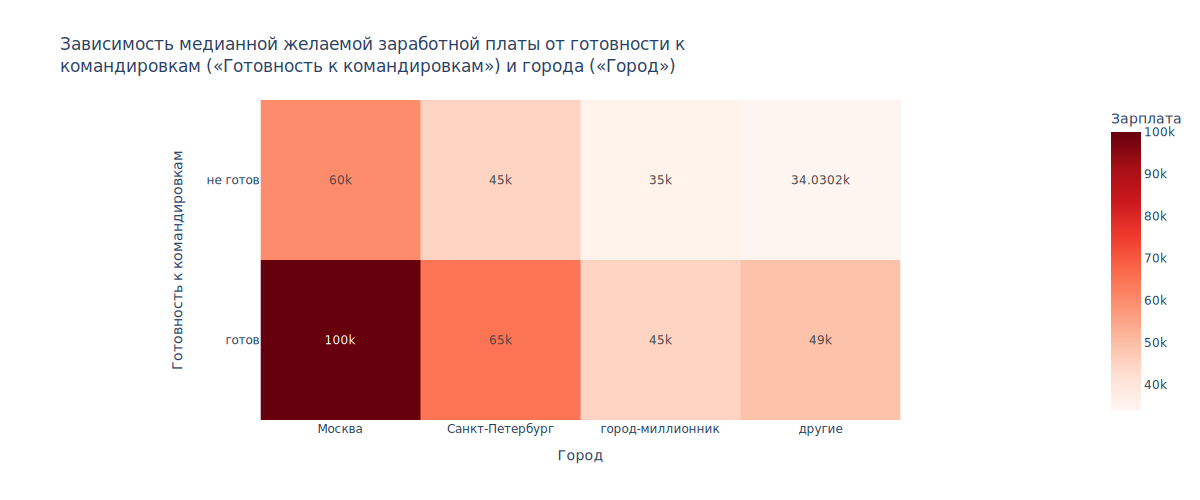

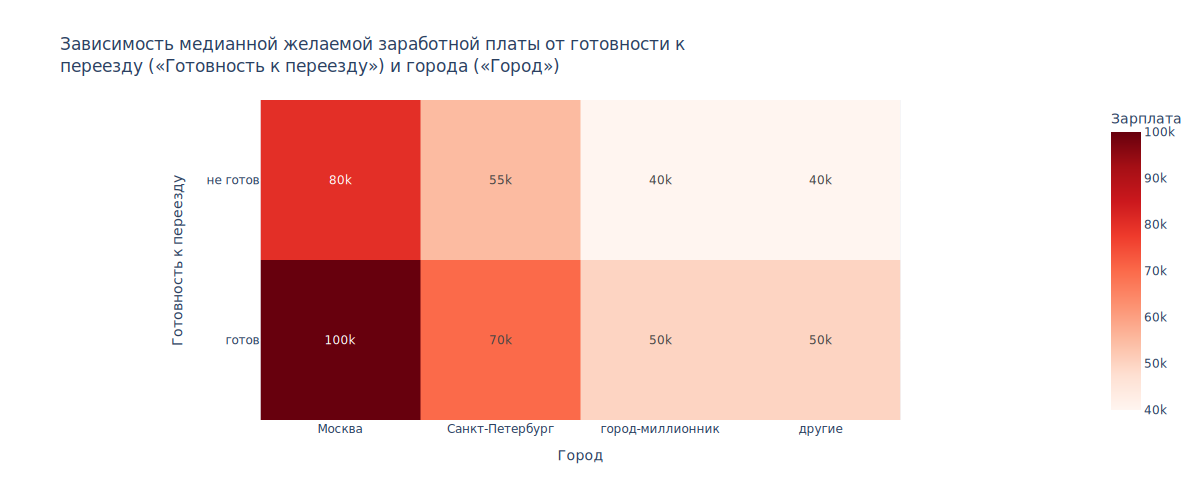

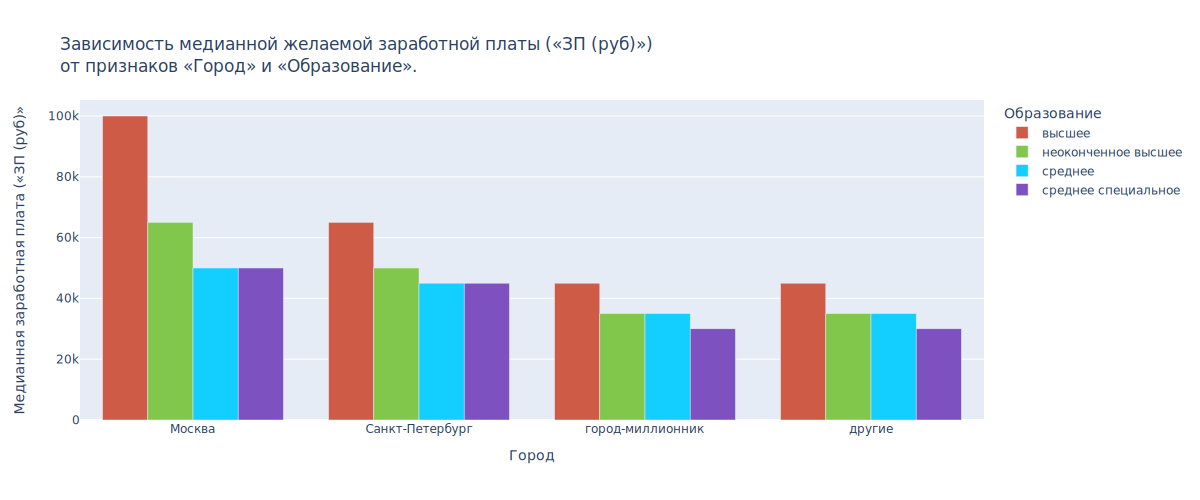

In [202]:
# Построим доплнительно 2 тепловые карты и столбчатую диаграмму

# Построим первую сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы 
# от готовности к командировкам («Готовность к командировкам») и города («Город»).
data_set_pivot_1 = data_set.pivot_table(
    values='ЗП (руб)',
    index='Готовность к командировкам',
    columns='Город',
    aggfunc='median', 
)

# переименуем значания True/False на готов/не готов для улучшения читаемости тепловой карты
data_set_pivot_1 = data_set_pivot_1.rename(index={True: 'готов', False: 'не готов'})

# строим первую тепловую карту
fig_1 = px.imshow(data_set_pivot_1, text_auto=True,
                title="Зависимость медианной желаемой заработной платы от готовности к<br>командировкам («Готовность к командировкам») и города («Город»)",
                labels=dict(color='Зарплата'),
                width=1200, 
                height=500, 
                color_continuous_scale='Reds' 
                )

fig_1.show('svg')


# Построим вторую сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы 
# от готовности к переезду («Готовность к переезду») и города («Город»).
data_set_pivot_2 = data_set.pivot_table(
    values='ЗП (руб)',
    index='Готовность к переезду',
    columns='Город',
    aggfunc='median', 
)

# переименуем значания True/False на готов/не готов для улучшения читаемости тепловой карты
data_set_pivot_2 = data_set_pivot_2.rename(index={True: 'готов', False: 'не готов'})

# строим вторую тепловую карту
fig_2 = px.imshow(data_set_pivot_2, text_auto=True,
                title="Зависимость медианной желаемой заработной платы от готовности к<br>переезду («Готовность к переезду») и города («Город»)",
                labels=dict(color='Зарплата'),
                width=1200, 
                height=500, 
                color_continuous_scale='Reds' 
                )

fig_2.show('svg')

# Построим еще столбчатую диаграмму, которая показывает зависимость медианной заработной платы («ЗП (руб)») 
# от признаков «Город» и «Образование». 

# создадим сводную таблицу под условия задачи
data_set_pivot_3 = data_set.pivot_table(
    values='ЗП (руб)',
    index='Город',
    columns='Образование',
    aggfunc='median', 
)

# столбчатая диаграмма
fig_3 = px.bar(data_set_pivot_3, barmode='group',
                 title='Зависимость медианной желаемой заработной платы («ЗП (руб)»)<br>от признаков «Город» и «Образование».',
                 labels={'value':'Медианная заработная плата («ЗП (руб)» ',
                         'Город':'Город ',
                         'Образование': 'Образование '
                         },
                 color_discrete_sequence=['#cd5b45', '#81c74b', '#13cfff', '#7e51c1'],
                 height=500,width=1200
                 )


fig_3.show('svg')

fig_1.write_html("plotly/12.html")
fig_2.write_html("plotly/13.html")
fig_3.write_html("plotly/14.html")

[ссылка на диаграмму](plotly/12.html)  
[ссылка на диаграмму](plotly/13.html)  
[ссылка на диаграмму](plotly/14.html)  
### Выводы по представленным тепловым картам (2 верхние диаграммы).
- медианная заработная плата наименьшая в других городах и городах-миллионниках, в Санкт-Петербурге она выше, в Москве - еще выше.
- соискатель готовый к командировкам или переезду расчитывает на более высокую заработную плату во всех городах.
- разница в медианной заработной плате между соискателями готовыми к командировкам по сравнению с неготовыми:
    - в других городах 15 тыс. рублей.
    - в городах-миллионниках 10 тыс. рублей (меньше чем в других городах).
    - в Санкт-Петербурге 20 тыс. рублей.
    - в Москве 40 тыс. рублей (максимум)
- разница в медианной заработной плате между соискателями готовыми к переезду по сравнению с неготовыми:
    - в других городах и городах-миллионниках 10 тыс. рублей.
    - в Санкт-Петербурге 15 тыс. рублей.
    - в Москве 20 тыс. рублей (максимум).
### Выводы по представленной столбчатой диаграмме (нижний график).
- во всех категориях городов заработная плата соискателей с высшим образованием выше, чем у остальных.
- в Москве уровень медианной желаемой зарплаты у соискателей с высшим образованием составляет 100 тыс. рублей, что в 1.5траза выше, чем у таких же соискателей в Санкт-Петербурге и более чем в 2 раза выше, чем у соискателей в оставшихся категориях городов.
- уровень заработной платы у соискателей с высшим и неоконченным высшим образованием в столицах выше, чем у соискателей со средним и средним специальным образованием. В Москве эта разница максимальная.
- медианная заработная плата в городах-миллионниках и других городах одинакова в разрезе признака образования, причем у соискателей с неоконченным высшим и средним образованием она на одном уровне и составляет 35 тыс. рублей.
- уровень ожидаемой заработной платы в Санкт-Петербурге и Москве одинаковый среди соискателей со средним и средним специальным образованием и равен 45 и 50 тыс. рублей соответственно.
- интересно то, что в городах-миллионниках и других городах соискатели со средним специальным образованием расчитывают на меньшую заработную плату, по сравннию с соискателями со средним образованием.
***

# Очистка данных

1). Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [203]:
# ищем дупбикаты
dupl_columns = list(data_set.columns)
mask = data_set.duplicated(subset=dupl_columns)
print(f'Число найденных дубликатов: {data_set[mask].shape[0]}')

# удаляем дубликаты
data_set = data_set.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_set.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


2). Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [204]:
null_data_set = data_set.isnull().sum()
display(null_data_set[null_data_set > 0])

# отвечаем на вопрос в Задании 5.2
answer = null_data_set[null_data_set > 0]['Опыт работы (месяц)']
print(f'В столбце «Опыт работы (месяц)» имеется {answer} пропусков.')

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

В столбце «Опыт работы (месяц)» имеется 168 пропусков.


3). Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [205]:
# удаляем строки с пропусками в признаках «Последнее/нынешнее место работы», «Последняя/нынешняя должность»
data_set= data_set.dropna(how='any', axis=0) 

# заполним пропуски в столбце 'Опыт работы (месяц)' медианным значением
values = {'Опыт работы (месяц)': data_set['Опыт работы (месяц)'].median()}
data_set = data_set.fillna(values)

# отвечаем на вопрос в Задании 5.3
answer = round(data_set['Опыт работы (месяц)'].mean())
print(f'Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков равно {answer}.')

Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков равно 114.


4). Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [206]:
# проверим скольно у нас резюме с зарплатой меньше 1000 руб. и больше 1 миллиона
# и ответим на вопрос в Задании 5.4
mask = (data_set['ЗП (руб)'] > 1000000) | (data_set['ЗП (руб)'] < 1000)
answer = data_set[mask].shape[0]

print(f'Мы нашли {answer} выбросов.')

''' Примечание! Ответ 87 платформа у меня не приняла.
    Однако, когда я выполнил это задание ПЕРЕД удалением дубликатов,
    то получил 89 выбросов и этот ответ платформа посчитала верным.
    
    Либо ошибка у меня, либо на платформе. 
    Если первый вариант - прошу снять балл за это задание.
    
    Я переделал задания по эталонам и сравнил эталонный признак 'ЗП (руб)' 
    с моим, используя .describe - значения идентичны
'''
# удалим найденные выбросы
data_set = data_set.drop(data_set[mask].index)


Мы нашли 87 выбросов.


5). В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [207]:
# найдем и удалим резюме, в которых опыт работы в годах превышает возраст соискателя
outliers = data_set[data_set['Опыт работы (месяц)']/12 > data_set['Возраст']]
data_set = data_set.drop(outliers.index)

# отвечаем на вопрос в Задании 5.5
answer = outliers.shape[0]
print(f'Всего найдено и удалено {answer} резюме, в которых опыт работы в годах превышал возраст соискателя.')

Всего найдено и удалено 7 резюме, в которых опыт работы в годах превышал возраст соискателя.


6). В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

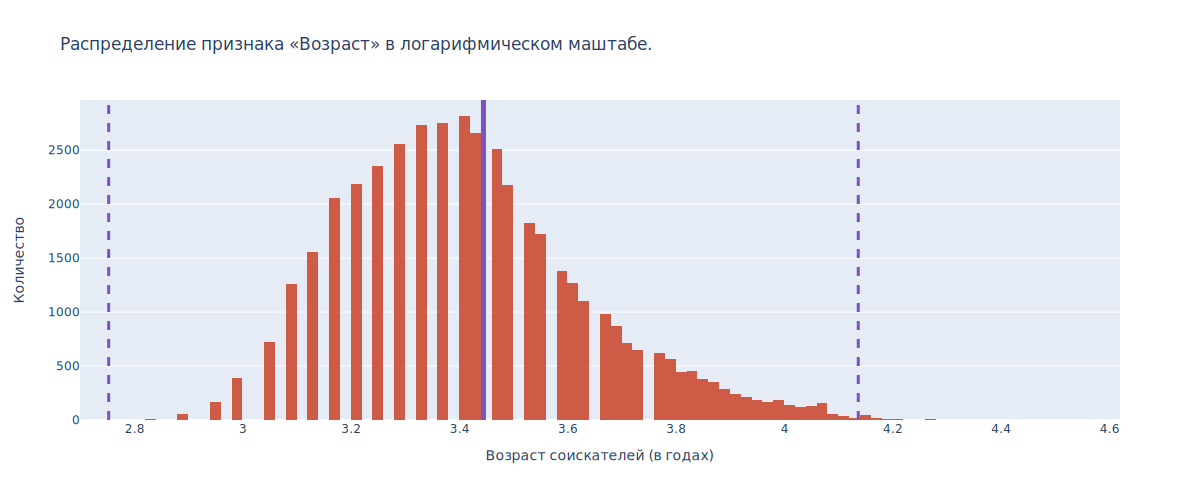

Численный показатель асимметрии равен 0.4544791093831789.
Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44316

Подробнее о выбросах


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0


In [208]:
# логарифмируем значения признака Возраст
log_age = np.log(data_set['Возраст'])

# гистограмма
fig_hist = px.histogram(log_age, x='Возраст', nbins=100, 
                   title='Распределение признака «Возраст» в логарифмическом маштабе.',
                   labels={'Возраст':'Возраст соискателей (в годах) '},
                   color_discrete_sequence=['#cd5b45'],
                   height=500,width=1200,
                   )
fig_hist.add_vline(x=log_age.mean(), line_width=5, line_color='#7e51c1')
fig_hist.add_vline(x=log_age.mean()+ 3 * log_age.std(), line_width=3, line_dash="dash", line_color='#7e51c1')
fig_hist.add_vline(x=log_age.mean()- 3 * log_age.std(), line_width=3, line_dash="dash", line_color='#7e51c1')

fig_hist.update_yaxes(title_text='Количество')

fig_hist.show('svg')

fig_hist.write_html("plotly/15.html")

# дополнительно расчитаем численный показатель ассиметрии
print(f'Численный показатель асимметрии равен {log_age.skew()}.')

# используем модифицированную функцию для z-отклонения
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]) # не прибавляем единицу, т.к. признак Возраст > 0
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, data_set = outliers_z_score_mod(data_set, 'Возраст', log_scale=True, left=3, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {data_set.shape[0]}')

print('\nПодробнее о выбросах')
display(outliers)

[ссылка на диаграмму](plotly/15.html)
### Выводы по представленной гистограмме и таблице.
- Среднее значение находится правее моды, это свойство распределений с правосторонней асимметрией. Кроме того, численный показатель ассиметрии положительный, что также указывает на правостороннюю ассиметрию.
- Также справа видны наблюдения, которые мы не захватили своим интервалом (слева тоже есть, но единичные).
- Действительно, имеет смысл добавить одну сигму справа.
- Получили 3 выброса возрастом 15, 15 и 100 лет.